In [1]:
# imports
import json, re, time, unicodedata, unidecode, itertools, os, random
from collections import defaultdict
from datetime import date, datetime, timedelta
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from pattern.nl import sentiment
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew


In [61]:
allDone()

In [2]:
# files
#MWE
#topics = json.load(open('D:\\4. Data\\Amazones_Forum_Export_JSON\\MWE_topic.json'))
#posts = json.load(open('D:\\4. Data\\Amazones_Forum_Export_JSON\\MWE.json'))
#regular
#forums1 = json.load(open('D:\\4. Data\\Amazones\\oud_forums.json'))
#forums2 = json.load(open('D:\\4. Data\\Amazones\\nieuw_forums.json'))
topics1 = json.load(open('D:\\4. Data\\Amazones\\oud_topics.json'))
topics2 = json.load(open('D:\\4. Data\\Amazones\\nieuw_topics.json'))
posts1 = json.load(open('D:\\4. Data\\Amazones\\oud_posts.json'))
posts2 = json.load(open('D:\\4. Data\\Amazones\\nieuw_posts.json'))
users1 = json.load(open('D:\\4. Data\\Amazones\\oud_users.json'))
users2 = json.load(open('D:\\4. Data\\Amazones\\nieuw_users.json'))
userstatus = json.load(open('D:\\4. Data\\Amazones\\nieuw_users_status.json'))

In [14]:
files = [topics1,topics2,posts1,posts2,users1,users2,userstatus]
for f in files:
    print len(f)
# from the length of these files, we know that the new file is indeed only the addition of new posts. Not a new dataset including old posts
# we also know that the 'complete' user list is not by far complete. This is weird. Or are they only the users that have posted?

2437
92
118391
1778
9177
457
5690


In [379]:
blocklist = set()
activelist = set()
timedict = dict()
for f in userstatus:
    timedict[f['user_id']] = (f['created_date'],f['last_access'])
    if f['status']=='Geblokkeerd':
        blocklist.add(f['user_id'])
    if f['status']=='Actief':
        activelist.add(f['user_id'])
# notitie: er zijn 30 gebruikers die dubbel in de data staan.

In [381]:
print len(blocklist)
print len(activelist)
print len(timedict)
print len(set().union(blocklist,activelist))

259
5371
5630
5630
set([])


In [254]:
#363 (Active) + 65 (Blocked) = 428 users

In [409]:
over_treshold = []
determine_active_users(timedict.keys())
print len(over_treshold)

428
65
363


min: 44 mean: 2026.67217630854 median: 1885.0 max: 4971 standard deviation: 1226.0366187856107
skew: 0.39222661279 kurtosis: -0.778171838912 n:  363
min: 125 mean: 1522.8923076923077 median: 1166.0 max: 4296 standard deviation: 1116.9449834681539
skew: 1.03617428058 kurtosis: 0.0887835283614 n:  65


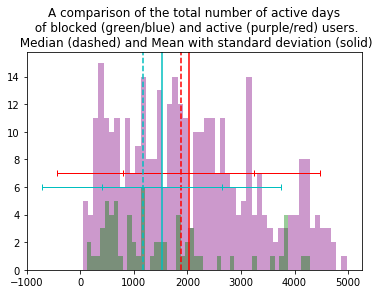

In [440]:
over_treshold = []
determine_active_users(activelist)

beenherelist = []
#over_treshold = random.sample(over_treshold, 65)
for user in over_treshold:
    created = datetime.strptime(timedict[user][0], '%d/%m/%Y - %H:%M')
    last_seen = datetime.strptime(timedict[user][1], '%d/%m/%Y - %H:%M')
    been_here = last_seen-created
    beenherelist.append(been_here.days)
print "min:", np.min(beenherelist),
print "mean:", np.mean(beenherelist),
print "median:", np.median(beenherelist),
print "max:", np.max(beenherelist),
print "standard deviation:", np.std(beenherelist)
print "skew:", skew(beenherelist), #negative skew
print "kurtosis:", kurtosis(beenherelist), # mesokurtic (normal, but irrelevant because the distribution is already non-normal because of the skew)
print "n: ", len(beenherelist)
plt.close()
plt.hist(beenherelist,bins = 50, color = 'purple', alpha = 0.4)
plt.plot([np.mean(beenherelist)-(2*np.std(beenherelist)),np.mean(beenherelist)-np.std(beenherelist),np.mean(beenherelist)+np.std(beenherelist),np.mean(beenherelist)+(2*np.std(beenherelist))],[7,7,7,7],'r-', linewidth = 1)
plt.plot([np.mean(beenherelist)-(2*np.std(beenherelist)),np.mean(beenherelist)-np.std(beenherelist),np.mean(beenherelist)+np.std(beenherelist),np.mean(beenherelist)+(2*np.std(beenherelist))],[7,7,7,7],'r|')
plt.axvline(x=np.mean(beenherelist), color = 'r')
plt.axvline(x=np.median(beenherelist), color = 'r', ls = '--')
plt.title('Median (green) and Mean with standard deviation (red) of days subsribed on the forum')
#plt.show()
#bepaal gemiddelde actieve periode, en stdev.

over_treshold = []
determine_active_users(blocklist)

beenherelist = []
#over_treshold = random.sample(over_treshold, 65)
for user in over_treshold:
    created = datetime.strptime(timedict[user][0], '%d/%m/%Y - %H:%M')
    last_seen = datetime.strptime(timedict[user][1], '%d/%m/%Y - %H:%M')
    been_here = last_seen-created
    beenherelist.append(been_here.days)
print "min:", np.min(beenherelist),
print "mean:", np.mean(beenherelist),
print "median:", np.median(beenherelist),
print "max:", np.max(beenherelist),
print "standard deviation:", np.std(beenherelist)
print "skew:", skew(beenherelist), #negative skew
print "kurtosis:", kurtosis(beenherelist), # mesokurtic (normal, but irrelevant because the distribution is already non-normal because of the skew)
print "n: ", len(beenherelist)
#plt.close()
plt.hist(beenherelist,bins = 50, color = 'green', alpha = 0.4)
plt.plot([np.mean(beenherelist)-(2*np.std(beenherelist)),np.mean(beenherelist)-np.std(beenherelist),np.mean(beenherelist)+np.std(beenherelist),np.mean(beenherelist)+(2*np.std(beenherelist))],[6,6,6,6],'c-', linewidth = 1)
plt.plot([np.mean(beenherelist)-(2*np.std(beenherelist)),np.mean(beenherelist)-np.std(beenherelist),np.mean(beenherelist)+np.std(beenherelist),np.mean(beenherelist)+(2*np.std(beenherelist))],[6,6,6,6],'c|')
plt.axvline(x=np.mean(beenherelist), color = 'c')
plt.axvline(x=np.median(beenherelist), color = 'c', ls = '--')
plt.title('A comparison of the total number of active days\n of blocked (green/blue) and active (purple/red) users.\n Median (dashed) and Mean with standard deviation (solid)')
plt.show()
# die paarse plot zegt eigenlijk iets over de huidige samenstelling van het forum: is die normaal? zijn er van alle dagen van het jaar evenveel aanmeldingen? ja wel redelijk dus, want weinig skew (hoewel wel wat platykurtosis in de verdeling.)

In [7]:
firstpost = dict()
for user in T:
    if len(T[user])>0:
        firstpost[user] = min([datetime.strptime(x,'%d/%m/%Y - %H:%M') for x in T[user]])

NameError: name 'T' is not defined

In [4]:
def make_last_access_dict(last_access_dict = dict()):
	for u in userstatus:
		last_access_dict[u['user_id']] = u['last_access']
	return last_access_dict

In [5]:
first_access_dict = make_first_access_dict()
last_access_dict = make_last_access_dict()

In [443]:
no_posts = []
data = open('exclude.txt', 'r')
lines = data.readlines()
exclude = [l.rstrip() for l in lines]

for user in first_access_dict:
    if user in firstpost and user not in exclude:
        if (datetime.strptime(first_acces_dict[user],'%d/%m/%Y - %H:%M')-firstpost[user]).days>0:
            print user," access:", datetime.strptime(first_acces_dict[user],'%d/%m/%Y - %H:%M'), " posts:", firstpost[user]
    else:
        no_posts.append(user) #34 who post nothing

In [13]:
u = '76'
print datetime.strptime(first_access_dict[u],'%d/%m/%Y - %H:%M')
print firstpost[u]
print (datetime.strptime(first_access_dict[u],'%d/%m/%Y - %H:%M')-firstpost[u]).days
print datetime.strptime(last_access_dict[u],'%d/%m/%Y - %H:%M')

2015-03-26 09:56:00


KeyError: '76'

In [16]:
(datetime.strptime("26/03/2015 - 09:56",'%d/%m/%Y - %H:%M')-datetime.strptime("24/03/2016 - 04:00",'%d/%m/%Y - %H:%M')).days*24

-8736

In [17]:
4222/24


175

In [52]:
def factorial(x,y):
    if y ==1:
        return  x
    else:
        return x+factorial(x-1,y-1) if x>1 else 1

In [57]:
print factorial(4222,29) # 0 does x, 1 does x*x-1,

122032


In [265]:
over_treshold = []
first_accessdict = dict()
determine_active_users(['926'])
print over_treshold
print first_accessdict

['926']
{}


In [11]:
def remove_non_ascii(text):
    """ this function expects a string, and removes non-ascii characters from it """
    return unidecode.unidecode(text)

In [10]:
def cleanup(text):
    """ this function expects a string (post from the BVN/Amazones forum), and returns a cleaner version of it """
    # remove all links, images, quotes, and emailaddresses
    text=re.sub('<a.*?>(.*?)</a>','',text) #remove links
    text=re.sub('(http:|www)\S*','',text) #remove links without markup
    text=re.sub('\[\\\/url\]','',text)
    text=re.sub('<img.*?/>', '',text) #remove images
    text=re.sub('<div class="bb-quote">((\s|\S)*?)</div>','',text) #remove quotes
    text=re.sub('<script.*?>([\S\s]*?)</script>','',text) #remove emailaddresses

    # replace all emoticon-icons
    text=re.sub('<img.*?title="(.*?)".*?/>', '(EMO:\\1)',text) #replace emoticons by textual indicators 

    # replace (most) sideways latin emoticons
    text=re.sub('[^>]:-?(\)|\])','(EMO:smiley)',text)
    text=re.sub(u'☺️','(EMO:smiley)',text)
    text=re.sub('[^>]:-?(\(|\[)','(EMO:sad)',text)
    text=re.sub(';-?(\)|\])','(EMO:wink)',text)
    text=re.sub(r'(:|;|x|X)-?(D)+\b','(EMO:laugh)',text)
    text=re.sub(':-?(/|\\\|\|)','(EMO:frown)',text)
    text=re.sub(r'(:|;)-?(p|P)+\b','(EMO:cheeky)',text)
    text=re.sub('(:|;)(\'|\")-?(\(|\[)','(EMO:cry)',text)
    text=re.sub('\<3+','(EMO:heart)',text)
    text=re.sub(u'❤️','(EMO:heart)',text)
    text=re.sub('((\>:-?(\(|\]))|(\>?:-?@))','(EMO:angry)',text)
    text=re.sub('\>:-?(\)|\])','(EMO:evil)',text)
    text=re.sub(r'(:|;)-?(O|o|0)+\b','(EMO:shock)',text)
    text=re.sub('(:|;)-?(K|k|x|X)','(EMO:kiss)',text)
    # :s
    # :x is eigenlijk geen kus, geloof ik...

    #other important adjustments:
    text=re.sub('m\'?n\s','mijn ',text) # replacing m'n and mn with mijn, so it gets parsed correctly.
    text=re.sub('z\'?n\s','zijn ',text) #replacing z'n and zn with zijn
    text=re.sub('d\'?r\s','haar ',text) #replacing d'r and dr with zijn (only if followed by space, so dr. stays dr.)

    # replace all emoticons (and other things) written between double colons
    text=re.sub(':([a-zA-Z]+):','(EMO:\\1)',text)

    # remove remaining markup
    text=re.sub('</?(ol|style|b|p|em|u|i|strong|br|span|div|blockquote|li)(.*?)/?>','',text)
    text=re.sub('(\[|\]|\{|\})', '',text)

    # separate text from punctuation (may cause double/triple spaces - does not matter at this point)
    text = re.sub('(\.{2,}|/|\)|,|!|\?)','\\1 ',text) # space behind
    text=re.sub('(/|\()',' \\1',text) # space in front
    text=re.sub('(\w{2,})(\.|,)','\\1 \\2 ',text) #space 'between'

    return(remove_non_ascii(text))

In [8]:
def make_P_T_and_D(topics1,topics2,posts1,posts2):
    """ this function takes the .json files containing the thread starts and responses, and returns three things:
    [0]: a dictionary with the user-ID as key, and the post as value;
    [1]: a dictionary with the user-ID as key, and the time of posting as a value;
    [2]: a list of all datetimes present in the data (sorted by date, because the .json was already sorted) """
    P = defaultdict(list)
    T = defaultdict(list)
    D = []

    with tqdm(total=len(topics1)) as pbar:
        for t1 in reversed(topics1):
            pbar.update(1)
            P[t1['Author uid']].append((cleanup(t1["Body"]),1))
            T[t1['Author uid']].append(t1['Post date'])
            D.append(datetime.strptime(t1['Post date'], '%d/%m/%Y - %H:%M'))
            
    with tqdm(total=len(topics2)) as pbar:
        for t2 in reversed(topics2):
            pbar.update(1)
            P[t2['user_id']].append((cleanup(t2["body"]),1))
            T[t2['user_id']].append(t2['post_date'])
            D.append(datetime.strptime(t2['post_date'], '%d/%m/%Y - %H:%M'))

    with tqdm(total=len(posts1)) as pbar:
        for p1 in reversed(posts1):
            pbar.update(1)
            P[p1['Auteur-uid']].append((cleanup(p1["Body"]),0))
            T[p1['Auteur-uid']].append(p1['Datum van inzending'])
            D.append(datetime.strptime(p1['Datum van inzending'], '%d/%m/%Y - %H:%M'))
    
    with tqdm(total=len(posts2)) as pbar:
        for p2 in reversed(posts2):
            pbar.update(1)
            P[p2['user_id']].append((cleanup(p2["body"]),0))
            T[p2['user_id']].append(p2['post_date'])
            D.append(datetime.strptime(p2['post_date'], '%d/%m/%Y - %H:%M'))

    return (P,T,D)

In [3]:
def make_first_access_dict(first_accessdict = dict()):
    for u in userstatus:
        first_accessdict[u['user_id']] = u['created_date']
    return first_accessdict


def determine_active_users(include_only = []):
    global over_treshold
    
    data = open('exclude.txt', 'r')
    lines = data.readlines()
    exclude = [l.rstrip() for l in lines]
    
    if include_only == []:
        userlist = [u['user_id'] for u in userstatus]
    else:
        userlist = include_only
    for user in userlist:
        if len(T[user])<30:
            pass
        elif user in exclude:
            pass
        else:
            over_treshold.append(user)

In [277]:
over_treshold = []
determine_active_users(['926'])
print over_treshold
print make_first_access_dict()['926']

['926']
13/09/2004 - 18:30


In [ ]:
for user in make_first_access_dict():
    if
    min([len(x) for x in weekcount.values()])

In [85]:
def make_binlist(D,hours = None, days = None, months = None):
    """ this function takes a list of dates (D), and generates a new list of dates,
    starting at 4:00 AM just before the earliest date in D, and ending at 4:00 just after the latest date in D,
    with fixed timeticks between all dates in the list. The length of the timetick may be specified by the user,
    through either one of the arguments "hours", "days", or "months".
    If more than one argument is specified, only the smallest entity will be considered (hours<days<months)
    """
    #set lower and upper boundaries of a user's activity
    lower = min(D)
    upper = max(D)
    
    if lower.time()>=datetime.strptime('4:00','%H:%M').time():
        lower = lower.replace(hour = 4, minute = 0)
    else:
        lower = (lower+timedelta(days = -1)).replace(hour=4,minute=0)

    if upper.time()<datetime.strptime('12:00','%H:%M').time():
        upper = upper.replace(hour = 4, minute = 0)
    else:
        upper = (upper+timedelta(days=1)).replace(hour=4,minute=0)

    # als er uren ingegeven zijn, neem dan een zoveel-uur-bin
    if hours != None:
        return([lower + timedelta(hours=x) for x in range(0, (24*((upper-lower).days))+hours, hours)])
    # als er dagen ingegeven zijn, neem dan een zoveel-dag-bin
    elif days != None:
        return([lower + timedelta(days=x) for x in range(0, ((upper-lower).days)+days, days)])
    # als er maanden ingegeven zijn, neem dan een zoveel-maand-bin
    elif months != None:
        return([lower + relativedelta(months=x) for x in range(0, (((upper-lower).days)/30)+months, months)])
    else:
        print "please specify the size of the bins in hours, days or months"
        return []

In [15]:
def determine_questionmarks(body, Q=0):
    """ This function counts and returns the number of sentences in the provided input string
    that ends in at least one question mark """
    for sentence in sent_tokenize(body):
        if re.search('\?+', sentence):
            Q+=1
    if len(sent_tokenize(body))!=0:
        return float(Q)/float(len(sent_tokenize(body)))
    else:
        return 0

def determine_sentiment(body):
    """ this funciton determines and returns the average sentiment of sentences in the provided input string.
    It uses the pattern module to do so. Sentiment values may range from -1 to 1. """
    return np.mean([sentiment(sentence)[0] for sentence in sent_tokenize(body)]) 

def determine_subjectivity(body):
    """ This function determines and returns the average subjectivity of sentences in the provided input string.
    It uses the pattern module to do so. Subjectivity values may range from 0 to 1. """
    return np.mean([sentiment(sentence)[1] for sentence in sent_tokenize(body)]) 

def determine_post_length(body):
    """ This function determines and returns the length of the provided input string in sentences.
    It uses the nltk sent_tokenize function to do so. """
    return(len(sent_tokenize(body)))

def determine_sentence_length(body):
    """ This function determines and returns the average length of the sentences in the provided input string in words.
    It uses the nltk word_tokenize function to do so. """
    #word_tokenize also considers interpunction a word
    return np.mean([len(word_tokenize(sentence)) for sentence in sent_tokenize(body)])

In [9]:
def determine_week_activity(first_date,last_date,bindict):
    """ This function returns a dictionary that has kept track of the activity in week-bins, instead of day-bins.
    It expects two dates, to indicate in between which dates the dictionary should be built,
    and expects a dictionary in which all the user's active times are already stored"""
    for d in range(0, (last_date-first_date).days,7):
        week_start = first_date+timedelta(days=d)
        week_end = first_date+timedelta(days=d+7)
        for date in list(itertools.chain.from_iterable(bindict.values())):
            if week_start<=datetime.strptime(date, '%d/%m/%Y - %H:%M')<week_end:
                weekcountdict[week_start,week_end].append(1)
        if len(weekcountdict[week_start,week_end])==0:
            weekcountdict[week_start,week_end] = []
    return weekcountdict

In [10]:
def determine_past_activity(bindict,index,hours_back=24):
    """ This function returns the number of times a user has been active in the last hours_back hours (default 24h).
    The first hours_back time bins will for now have a value of 0 by default, to keep things easy."""
    if 0<= index-hours_back<=len(bindict):
        past_activity = np.sum([len(bindict[binlist[index-(x+1)],binlist[index+1-(x+1)]]) for x in range(hours_back)])
    else:
        past_activity=0
    return past_activity

In [11]:
def print_information(user, T, first_date,last_date,weekcount):
    """ this function prints useful basic information on the user's activity.
    It needs quite some input so make sure you've got them all:
    1) user ID, 2) a dictionary containing users-IDs as key, and any activity log as value,
    3,4) the first and last date of activity, and 5) the dictionary that kept track of the week activity. """
    print "User:", user
    print "posted one or more posts in", len(T[user]), "'bins'." 
    print "The first post: ", first_date
    print "The last post: ", last_date
    print "Activity spread over: ", last_date-first_date
    print "The average nr of posts per week: ", np.mean([len(x) for x in weekcount.values()]), "including long times of inactivity."
    print "The average nr of posts in non-empty weeks: ", np.mean([len(x) for x in weekcount.values() if not x==[]])
    print "The range of activity: ", min([len(x) for x in weekcount.values()]), " to ", max([len(x) for x in weekcount.values()]), " posts per week"
    print

In [ ]:
# add ETD to files

path = "C:\Users\sternheimam\Desktop\my-notebook\user-csvs"

for filename in os.listdir(path):
    ETDlist = []
    user = re.search(r'[0-9]+',filename).group(0)
    lastPost = datetime.strptime(''.join(deathdict[user]), '%d/%m/%Y - %H:%M')
    data = pd.read_csv(os.path.join(path, filename))
    for timeStamp in data['Date & Time']:
        ETDlist.append((lastPost - (datetime.strptime(timeStamp, '%Y-%m-%d %H:%M:%S'))).days)
    data['ETD'] = ETDlist
    data.to_csv(os.path.join(path,filename),index=False)
    
# add churn_in_year to files

for filename in os.listdir(path):
    boolean_churn_list = []
    user = re.search(r'[0-9]+',filename).group(0)

    else:
        last_access = churndate[user]
        data = pd.read_csv(os.path.join(path, filename))
        for timeStamp in data['Date & Time']:
            future_churn = 1 if ((datetime.strptime(timeStamp, '%Y-%m-%d %H:%M:%S')) +
                timedelta(days = 7)) > last_access else 0
            boolean_churn_list.append(future_churn)
        data['churnThisYear'] = boolean_churn_list
        data.to_csv(os.path.join(path,filename),index=False)

In [12]:
PTD = make_P_T_and_D(topics1,topics2,posts1,posts2) 
P = PTD[0]
T = PTD[1]
D = PTD[2]

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [143]:
exclude = open('exclude.txt', 'r')
lines = exclude.readlines()
exclude = [l.rstrip() for l in lines]

In [145]:
over_treshold = []
determine_active_users() # for practical reasons, right now only user 1144 is selected. If more users desired, simply enter them in list form.
print len(over_treshold)

441


In [16]:
# path for saving csv files
path = r"C:\Users\sternheimam\Desktop\my-notebook\user-csvs" 

#---------------------------
# global variables
#---------------------------
# chronological list of (lower) bin boundaries. Bin size specified in hours, days or months
binlist = make_binlist(D,months=1)

# determine the negative difference for measuring the 'backtrack' feature
neg_diff = 24


#---------------------------
# determine 'relevant' users
#---------------------------
# initiate empty list of users relevant to measure
over_treshold = []
determine_active_users() # for practical reasons, right now only user 1144 is selected. If more users desired, simply enter them in list form.


# now, generate three different bin-kinds of files for all users
# add variables for ETD, departure-in-month/6months/year, activity-last-month, etc
# make a .py

#---------------------------
# go through all users in over_treshold, and do stuff..
#---------------------------
# show the progress, while going through the active users
with tqdm(total=len(over_treshold)) as processbar:
    for user in over_treshold:
        print user,
        processbar.update(1)
        
        #---------------------------
        # initiate some user-specific variables
        #---------------------------
        first_date = 0
        last_date = 0
        inactivity = 0
        
        # all lists starting with csv_ are lists that will eventually contain all values that end up in the csv file
        csv_date = []            #datetime
        csv_sentiment = []       #sentiment value (-1 to 1)
        csv_questionmarks = []   #question mark-ending sentences (float)
        csv_subjectivity = []    #subjectivity value (0 to 1)
        csv_sentencelength = []  #length of sentence in words (float)
        csv_postlength = []      #length of post in sentences (float)
        csv_startposts = []      #1 for a thread start, 0 for a response (float) 
        csv_inactivity = []      #hours passed since last activity (int)
        csv_backtrack = []       #posts posted in last x hours (x = neg_diff; default 24h)
        
        # dictionaries to keep track of activity within certain time bins
        bindict = defaultdict(list)        #bins with size 'timetick' (default 1h), values = post-times 
        postdict = defaultdict(list)       #bins with size 'timetick' (default 1h), values = posts
        metadict = defaultdict(list)       #bins with size 'timetick' (default 1h), values = 1 or 0 (start or response)
        weekcountdict = defaultdict(list)  #bins with size = 7 days, values = '1' for every post
        backtrackdict = defaultdict(list)  #bins with size = neg_diff (default 24h), values = nr of posts in last neg_diff hours
        # TO DO: linguistic markers, like adjectives / pronouns / emoticons, and the diversity of topics / vocabulary
        
        
        #---------------------------
        # loop through the (sorted) list of datetimes, and do stuff..
        #---------------------------
        for index,boundary in enumerate(tqdm(binlist)):
            # determine time bin boundaries for dictionaries
            if index+1>=len(binlist):
                break
            else:
                lower = binlist[index]
                upper = binlist[index+1]
                
                #---------------------------
                # Loop through T, collecting all activity for the selected user
                #---------------------------
                # determine in which time bin the user's activity belongs
                for time in T[user]:
                    if lower<=datetime.strptime(time, '%d/%m/%Y - %H:%M')<upper:
                        bindict[lower,upper].append(time)
                        
                        # and determine how active the user has been in past neg_diff hours
                        past_activity = determine_past_activity(bindict,index,neg_diff)
                        backtrackdict[lower,upper].append(past_activity)
                        
                        # determine the first and last active dates
                        if first_date == 0:
                            first_date = datetime.strptime(time, '%d/%m/%Y - %H:%M')
                            last_date = datetime.strptime(time, '%d/%m/%Y - %H:%M')
                        else:
                            last_date = datetime.strptime(time, '%d/%m/%Y - %H:%M')
                        
                        # split the text in P from the start/response-information
                        body = P[user][T[user].index(time)][0]
                        meta = P[user][T[user].index(time)][1]                        
                        postdict[lower,upper].append(body) 
                        metadict[lower,upper].append(meta)

                # fill up the still-empty places in the dictionary
                if len(bindict[lower,upper])==0:
                    bindict[lower,upper]=[]
                    postdict[lower,upper]=[]
                    metadict[lower,upper]=[]
                    backtrackdict[lower,upper]=[]
                
                #---------------------------
                # Fill csv_feature-lists with values 
                #---------------------------                
                # Treat different posts within same bin 'as one' (concatenate them)
                body = '. '.join(postdict[lower,upper]) #can be empty!
            
                # when then bin is empty, only add 1 to the inactivity feature
                if len(body) == 0:
                    inactivity+=1
                # when the bin is not empty, append a value to all csv_feature-lists (and reset 'inactivity')
                else:    
                    csv_date.append(lower)
                    csv_sentiment.append(determine_sentiment(body))
                    csv_questionmarks.append(determine_questionmarks(body))
                    csv_subjectivity.append(determine_subjectivity(body))
                    csv_sentencelength.append(determine_sentence_length(body))
                    csv_postlength.append(np.mean([determine_post_length(x) for x in postdict[lower,upper]]))
                    csv_startposts.append(np.mean(metadict[lower,upper]))
                    csv_inactivity.append(inactivity)
                    csv_backtrack.append(np.sum(backtrackdict[lower,upper][-1]))
                    inactivity = 0

        #---------------------------
        # Report the results for this user
        #--------------------------- 
        # determine average activity: over active period, and over only-active weeks 
        weekcount = determine_week_activity(first_date,last_date,bindict)   
        print_information(user, T, first_date,last_date,weekcount)            
                
        # put all csv_features into a dataframe
        df = pd.DataFrame({"Date & Time": csv_date, "Sentiment": csv_sentiment, "Questions": csv_questionmarks, 
                           "Subjectivity": csv_subjectivity, "Words/Sentence": csv_sentencelength, 
                           "Sentences/Post": csv_postlength, "First posts": csv_startposts,
                           "Inactivity": csv_inactivity, "Posts in last 24H": csv_backtrack}).dropna()
        name = "features_user_"+str(user)+".csv"       
        df.to_csv(os.path.join(path,name),index=False)
print " _ "
print "|_|"

A Jupyter Widget

1144

A Jupyter Widget

 User: 1144
posted one or more posts in 30 'bins'.
The first post:  2005-06-21 11:44:00
The last post:  2009-11-30 22:24:00
Activity spread over:  1623 days, 10:40:00
The average nr of posts per week:  0.12931034482758622 including long times of inactivity.
The average nr of posts in non-empty weeks:  1.3636363636363635
The range of activity:  0  to  3  posts per week


 _ 
|_|
